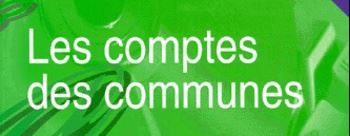

The object of this project is to make an study of the open database "les comptes des communnes".
Database: https://www.data.gouv.fr/fr/datasets/comptes-des-communes-2012-2020/

It is important to highlight that we do not know anything about this data, so we will start from scratch. 

The first thing we will do, will be to download the libraries and the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
data = pd.read_parquet(r'C:\Users\crist\mentoring\comptes\data\raw\data.parquet', engine='auto')
data.head()

,exer,outre_mer,reg_code,reg_name,dep_code,dep_name,epci_code,epci_name,tranche_population,rural,...,ordre_analyse1_section2,ordre_analyse1_section3,ordre_analyse2_section1,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,ordre_affichage
0,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070787.0,CC du Plateau de Lannemezan,2.0,Oui,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
1,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
2,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
3,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
4,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0


We take a look to the stadistical values, wich allow us, inter alia, to verify if there may be outliers. 
However, we must take into account that we are working with population and money from many different communes, wich cause the data to be extremely varied, and the extremes points do not necessarily have to be considered as outliers.

In [18]:
num_data.describe()

,exer,reg_code,epci_code,siren,ident,montant,montant_en_millions,ptot,euros_par_habitant
count,1.810173e+07,1.810173e+07,1.810173e+07,1.810173e+07,1.810173e+07,1.810173e+07,1.810173e+07,1.810173e+07,1.810173e+07
mean,2.014930e+03,5.361928e+01,2.131249e+08,2.144487e+08,2.144487e+13,4.053070e+05,4.053070e-01,3.568923e+03,NaN
std,2.213663e+00,2.416225e+01,2.032247e+07,2.993828e+06,2.993828e+11,1.132947e+07,1.132947e+01,4.358214e+04,NaN
min,2.012000e+03,1.000000e+00,2.000002e+08,2.000022e+08,2.000022e+13,-9.435051e+08,-9.435051e+02,0.000000e+00,-inf
25%,2.013000e+03,2.800000e+01,2.000660e+08,2.124034e+08,2.124034e+13,0.000000e+00,0.000000e+00,2.570000e+02,0.000000e+00
50%,2.015000e+03,5.200000e+01,2.000698e+08,2.146014e+08,2.146014e+13,1.529015e+04,1.529015e-02,6.180000e+02,2.856324e+01
75%,2.017000e+03,7.600000e+01,2.417005e+08,2.167031e+08,2.167031e+13,1.045885e+05,1.045885e-01,1.636000e+03,1.783217e+02
max,2.020000e+03,9.400000e+01,2.497401e+08,2.197402e+08,2.197402e+13,6.845968e+09,6.845968e+03,2.274880e+06,inf


***Categorical variables***

The proportion of categories of each variable:

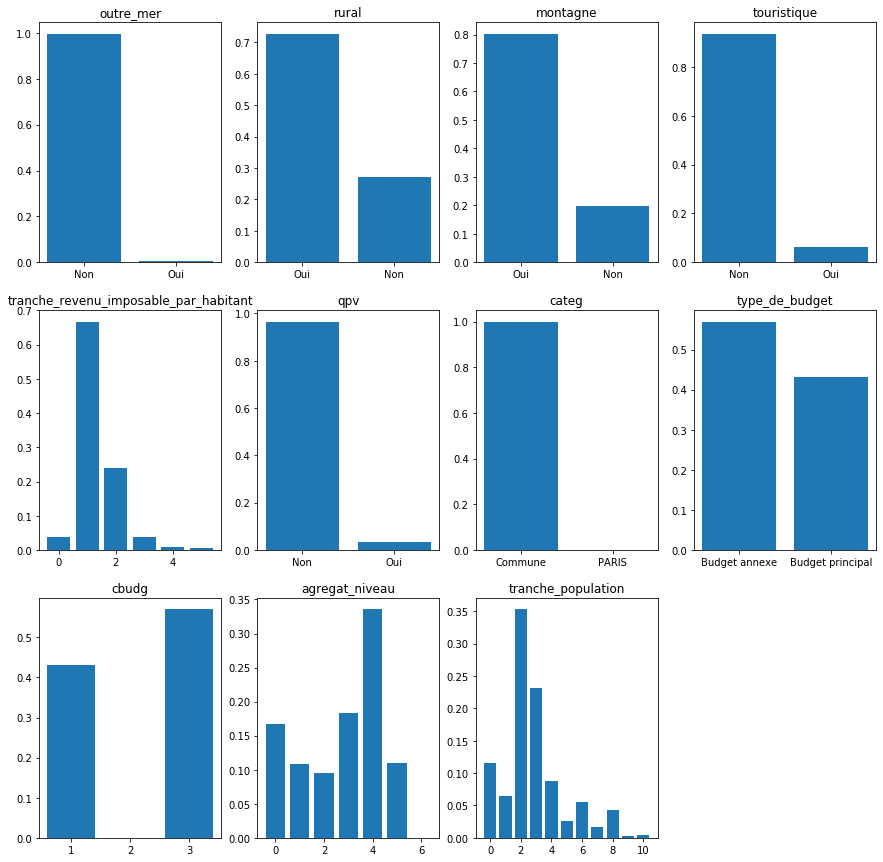

In [21]:
import matplotlib.pyplot as plt

l = ['outre_mer', 'rural', 'montagne', 'touristique', 'tranche_revenu_imposable_par_habitant', 'qpv', 'categ', 'type_de_budget', 'cbudg', 'agregat_niveau', 'tranche_population' ]
i=1
plt.figure(figsize= (15,15)) 
for element in l:
    plt.subplot(3,4,i)
    plt.bar(cat_data[element].unique(), cat_data[element].value_counts(normalize=True))
    plt.title(element);
    i+=1


This first analysis give us a first idea of the data. As we could expect, there is a minority of data that belongs to outre_mer.
Most of the budget goes to or comes from rural or mountain cities and the majority are no turistic. 
The minority of the data has a priority neighborhood under the wing of the city policy (qpv).
To go further we need to decrease zoom in the variables and to set an specific objective, since we have a lot of information.



### DATA ANALYSIS

As we work with a very big dataframe we are going to show the analysis separated by years

***Communes by region that have QPV, are rurals, mountain or touristic***

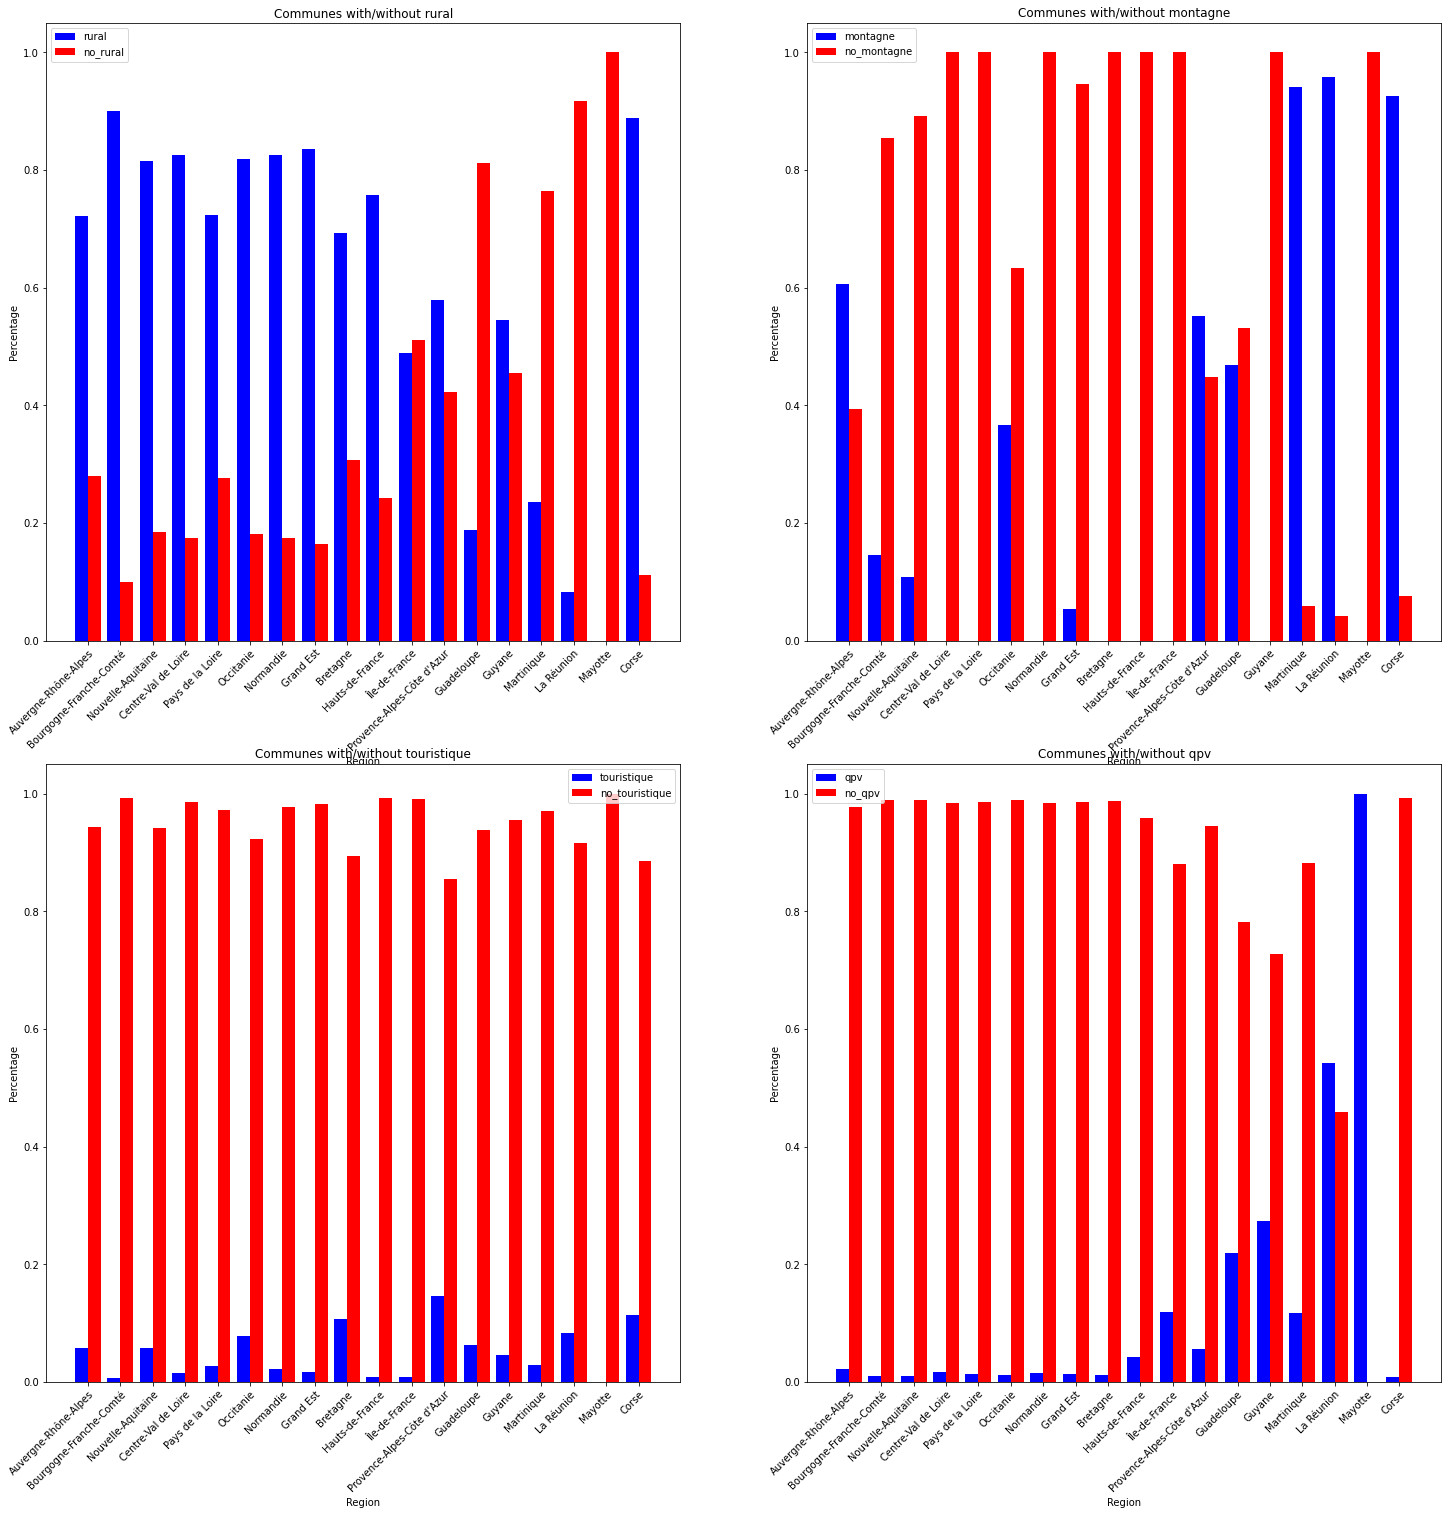

In [14]:
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

year = 2019
    
dt = df[df['exer'] == year]

regions = dt['reg_name'].unique()

options = ['rural', 'montagne', 'touristique', 'qpv']

d = {}
for element in options:
    for i in ['yes', 'no']:
        d[element+ '_'+ i] = [None for _ in range (len(regions))]
    
i=0
for r in regions:
    for o in options:       
        data = dt[dt['reg_name']==r]
        total_commune = data['com_name'].nunique()
        globals()[o] = data[data[o]=='Oui']
        globals()[o + '_' + 'no'] = data[data[o] == 'Non']
        globals()['total_' + o] = globals()[o]['com_name'].nunique()
        globals()['total_'+ o + '_' + 'no'] = total_commune - globals()['total_' + o] 
        perc_yes = globals()['total_' + o]/total_commune
        perc_no = globals()['total_'+ o + '_' + 'no'] / total_commune
        d[o +'_'+'yes'][i]=perc_yes
        d[o +'_'+'no'][i]=perc_no
    i+=1

graph = ['rural', 'montagne', 'touristique', 'qpv']

plt.figure(figsize= (25,25))
i = 1
for element in graph:
    plt.subplot(2,2,i)
    w = 0.4
    x = regions
    bar1 = np.arange(len(x))
    bar2 = [i+w for i in bar1]
    y1 = element + '_' + 'yes'
    y2 = element + '_' + 'no'
    plt.bar(bar1,  d[y1], w, color = 'blue', label = element)
    plt.bar(bar2,  d[y2], w, color = 'red', label = 'no_' + element)
    plt.xlabel('Region')
    plt.ylabel('Percentage')
    plt.xticks(bar1+w/2,x, rotation=45, ha = 'right', rotation_mode='anchor')
    plt.legend()
    plt.title('Communes with/without' + " " + element)
    i+=1


After this study we may wonder if there is a relation between the income/ expenditure and the type of commune.
From now on, we will breakdown data in income and expenditure

With respect to the qpv, since the qpv is a political policy that has the goal of reducing the complexity of the socially deprived areas, we can deduce that the communes with a qpv are more likely to expirience highest debt ratios and 
lower savings ratios. We are going to study with the population.

***Évolution dépenses de fonctionnement par année*** 

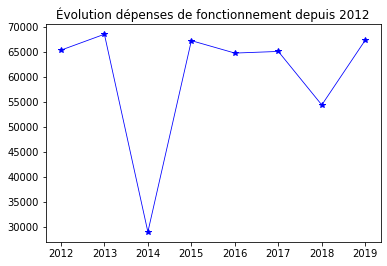

In [14]:
depenses_fonctionnement = ['Achats et charges externes', 'Frais de personnel', 'Charges financières', "Dépenses d'intervention", "Autres dépenses de fonctionnement"]
years = df['exer'].unique()
d = {}

for year in years:
    d[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat'].isin(depenses_fonctionnement))]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d[year] = total
    
fig, ax = plt.subplots()
ax.set_title('Évolution dépenses de fonctionnement depuis 2012')
ax.plot([year for year in sorted(years) if year != 2020], [d[year] for year in years if year !=2020], 'b-', linewidth = 0.8, marker = '*');

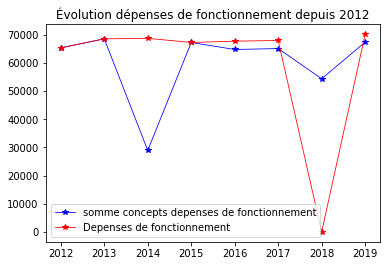

In [12]:
depenses_fonctionnement = ['Achats et charges externes', 'Frais de personnel', 'Charges financières', "Dépenses d'intervention", "Autres dépenses de fonctionnement"]
years = df['exer'].unique()
d = {}

for year in years:
    d[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat'].isin(depenses_fonctionnement))]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d[year] = total

d2 = {}
for year in years:
    d2[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat']=='Dépenses de fonctionnement')]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d2[year] = total
fig, ax = plt.subplots()
ax.plot([year for year in sorted(years) if year != 2020], [d[year] for year in years if year !=2020], 'b-',
linewidth = 0.8, marker = '*', label = 'somme concepts depenses de fonctionnement')
ax.plot([year for year in sorted(years) if year != 2020], [d2[year] for year in years if year !=2020], 'r-', linewidth = 0.8, marker = '*', label = 'Depenses de fonctionnement')
ax.set_title('Évolution dépenses de fonctionnement depuis 2012')
ax.legend()
plt.show()

***Dépenses de fonctionnement par habitant selon la taille de la commune et selon le type de commune***

C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


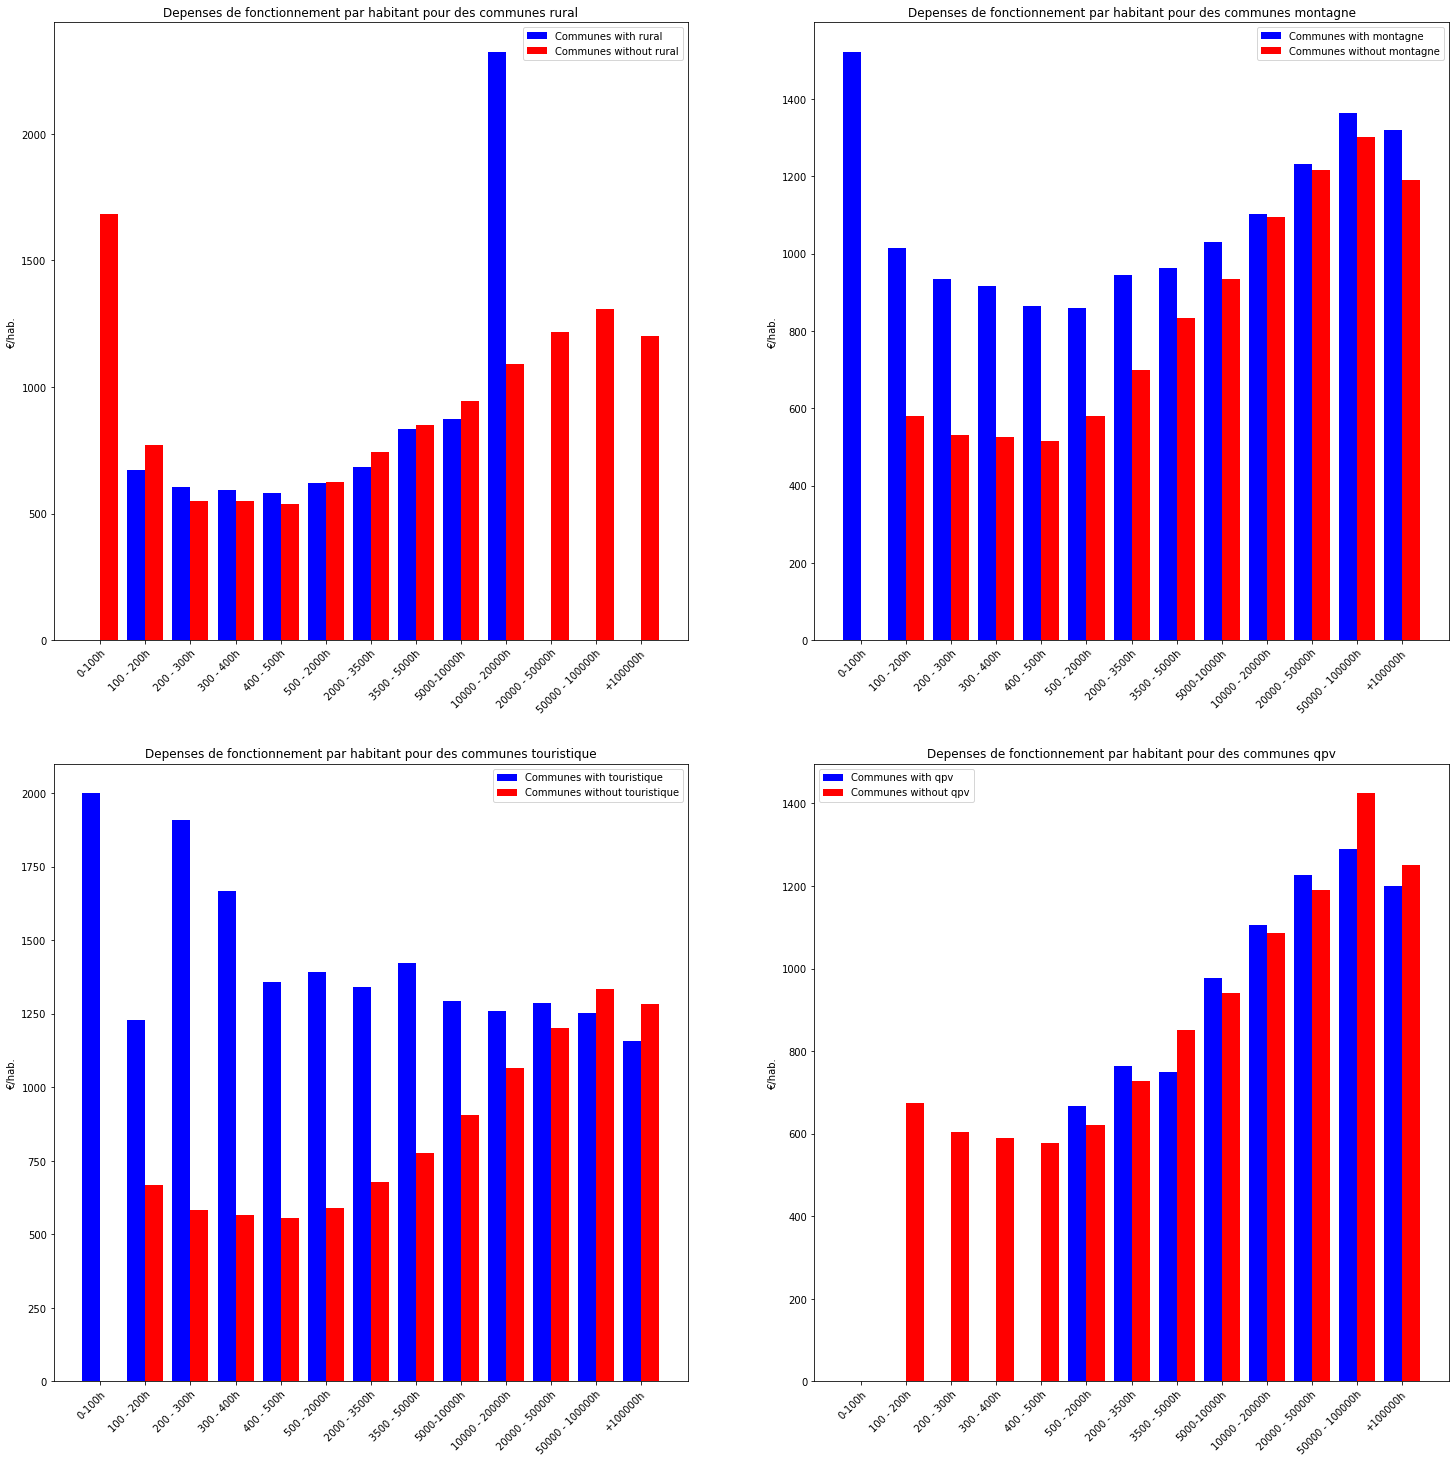

In [17]:
year = 2019

data = df[(df['exer']==year)&(df['agregat'] =='Dépenses de fonctionnement')& (df['type_de_budget'] == 'Budget principal')]


data['pop_group'] = pd.cut(data['ptot'],[0,100,200,300,400,500,2000,3500,5000,10000, 20000, 50000, 100000, data['ptot'].max()], 
                                     labels= ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h'], 
                                      include_lowest=True)



options = ['rural', 'montagne', 'touristique', 'qpv']
for o in options:
    globals()[o] = data[data[o]=='Oui']
    globals()[o + '_' + 'no'] = data[data[o]=='Non']
    globals()[o] = globals()[o][globals()[o]['agregat']=='Dépenses de fonctionnement']
    globals()[o + '_' + 'no'] = globals()[o + '_' + 'no'][globals()[o + '_' + 'no']['agregat']=='Dépenses de fonctionnement']
    globals()[o + '_' + 'sum'] = globals()[o].groupby(['pop_group']).agg({'euros_par_habitant':'mean'})
    globals()[o + '_' + 'no' + '_' + 'sum'] = globals()[o + '_' + 'no'].groupby(['pop_group']).agg({'euros_par_habitant':'mean'})
    globals()[o + '_' + 'sum'] =  globals()[o + '_' + 'sum'].fillna(0)
    globals()[o + '_' + 'no' + '_' + 'sum'] = globals()[o + '_' + 'no' + '_' + 'sum'].fillna(0)


plt.figure(figsize= (25,25))
i = 1
for o in options:
    plt.subplot(2,2,i)    
    w = 0.4
    x = ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h']
    bar1 = np.arange(len(x))
    bar2 = [i+w for i in bar1]
    plt.bar(bar1,  globals()[o + '_' + 'sum']['euros_par_habitant'], w, color = 'blue', label = 'Communes with' + " " + o)
    plt.bar(bar2,  globals()[o + '_' + 'no' + '_' + 'sum']['euros_par_habitant'], w, color = 'red', label = 'Communes without' + " " + o)
    #plt.xlabel('')
    plt.ylabel('€/hab.')
    plt.xticks(bar1+w/2,x, rotation=45, ha = 'right', rotation_mode='anchor')
    plt.legend()
    plt.title('Depenses de fonctionnement par habitant pour des communes' + ' ' + o)
    i+=1

***Dépenses de fonctionnement par habitant selon la taille de la commune et par type de dépense***

C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


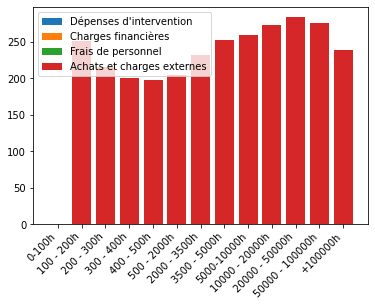

In [18]:
year = 2019

data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')]
    
data['pop_group'] = pd.cut(data['ptot'],[0,100,200,300,400,500,2000,3500,5000,10000, 20000, 50000, 100000, globals()[name]['ptot'].max()], 
                                     labels= ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h'], 
                                      include_lowest=True)


depenses = ['Achats et charges externes', 'Frais de personnel', 'Charges financières', "Dépenses d'intervention", "Autres dépenses de fonctionnement"]
pop_group = data['pop_group'].unique()

d = {}
for dep in depenses:
    d[dep]=None     
    
for dep in depenses:
    data = data[data['agregat'] == dep]
    globals()[dep] = data.groupby('pop_group').agg({'euros_par_habitant':'mean'}).reset_index()
    globals()[dep]['euros_par_habitant'] = globals()[dep]['euros_par_habitant'].fillna(0)   
    sol = globals()[dep].to_dict()
    d[dep] = sol['euros_par_habitant'] 
    
fig, ax = plt.subplots()
x = ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h']
ax.bar(x,d["Dépenses d'intervention"].values(), label = "Dépenses d'intervention");
ax.bar(x,d['Charges financières'].values(), bottom =list(d["Dépenses d'intervention"].values()), label = 'Charges financières');
ax.bar(x,d['Frais de personnel'].values(), bottom =list(d['Charges financières'].values()), label = 'Frais de personnel');
ax.bar(x,d['Achats et charges externes'].values(), bottom =list(d['Frais de personnel'].values()), label = 'Achats et charges externes');
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')


#ax.axhline(y=0, color='r') cambiar de color la linea del origen
#ax.set_title('Scores by group and gender')
ax.legend()
plt.show()    

***Évolution recettes de fonctionnement par année*** 

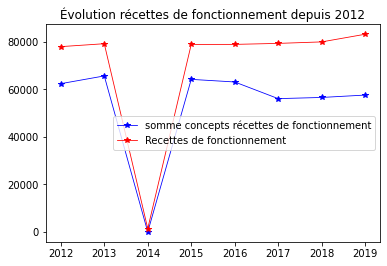

In [29]:
recettes_fonctionnement = ["Concours de l'êtat", 'Ventes de biens et services',  'Subventions reçues et participations',
                           'Autres recettes de fonctionnement', 'Impôts locaux', 'Fiscalité reversée', "Taxe d'enlévement des ordures ménagères"]

#recettes_fonctionnement = ['Autres dotations de fonctionnement', 'Dotation globale de fonctionnement', 'DETR','Péréquations et compensations fiscales', 'Fiscalité reversée',
#                           "Taxe d'enlévement des ordures ménagères", 'Autres impôts et taxes','Ventes de biens et services',  'Subventions reçues et participations',
#                           'Autres recettes de fonctionnement']
years = df['exer'].unique()
d = {}

for year in years:
    d[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat'].isin(recettes_fonctionnement))]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d[year] = total

d2 = {}
for year in years:
    d2[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat']=='Recettes de fonctionnement')]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d2[year] = total
fig, ax = plt.subplots()
ax.plot([year for year in sorted(years) if year != 2020], [d[year] for year in years if year !=2020], 'b-',
linewidth = 0.8, marker = '*', label = 'somme concepts récettes de fonctionnement')
ax.plot([year for year in sorted(years)], [d2[year] for year in years], 'r-', linewidth = 0.8, marker = '*', label = 'Recettes de fonctionnement')
ax.set_title('Évolution récettes de fonctionnement depuis 2012')
ax.legend()
plt.show()

***Recettes de fonctionnement par habitant selon la taille de la commune et selon le type de commune*** 

C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


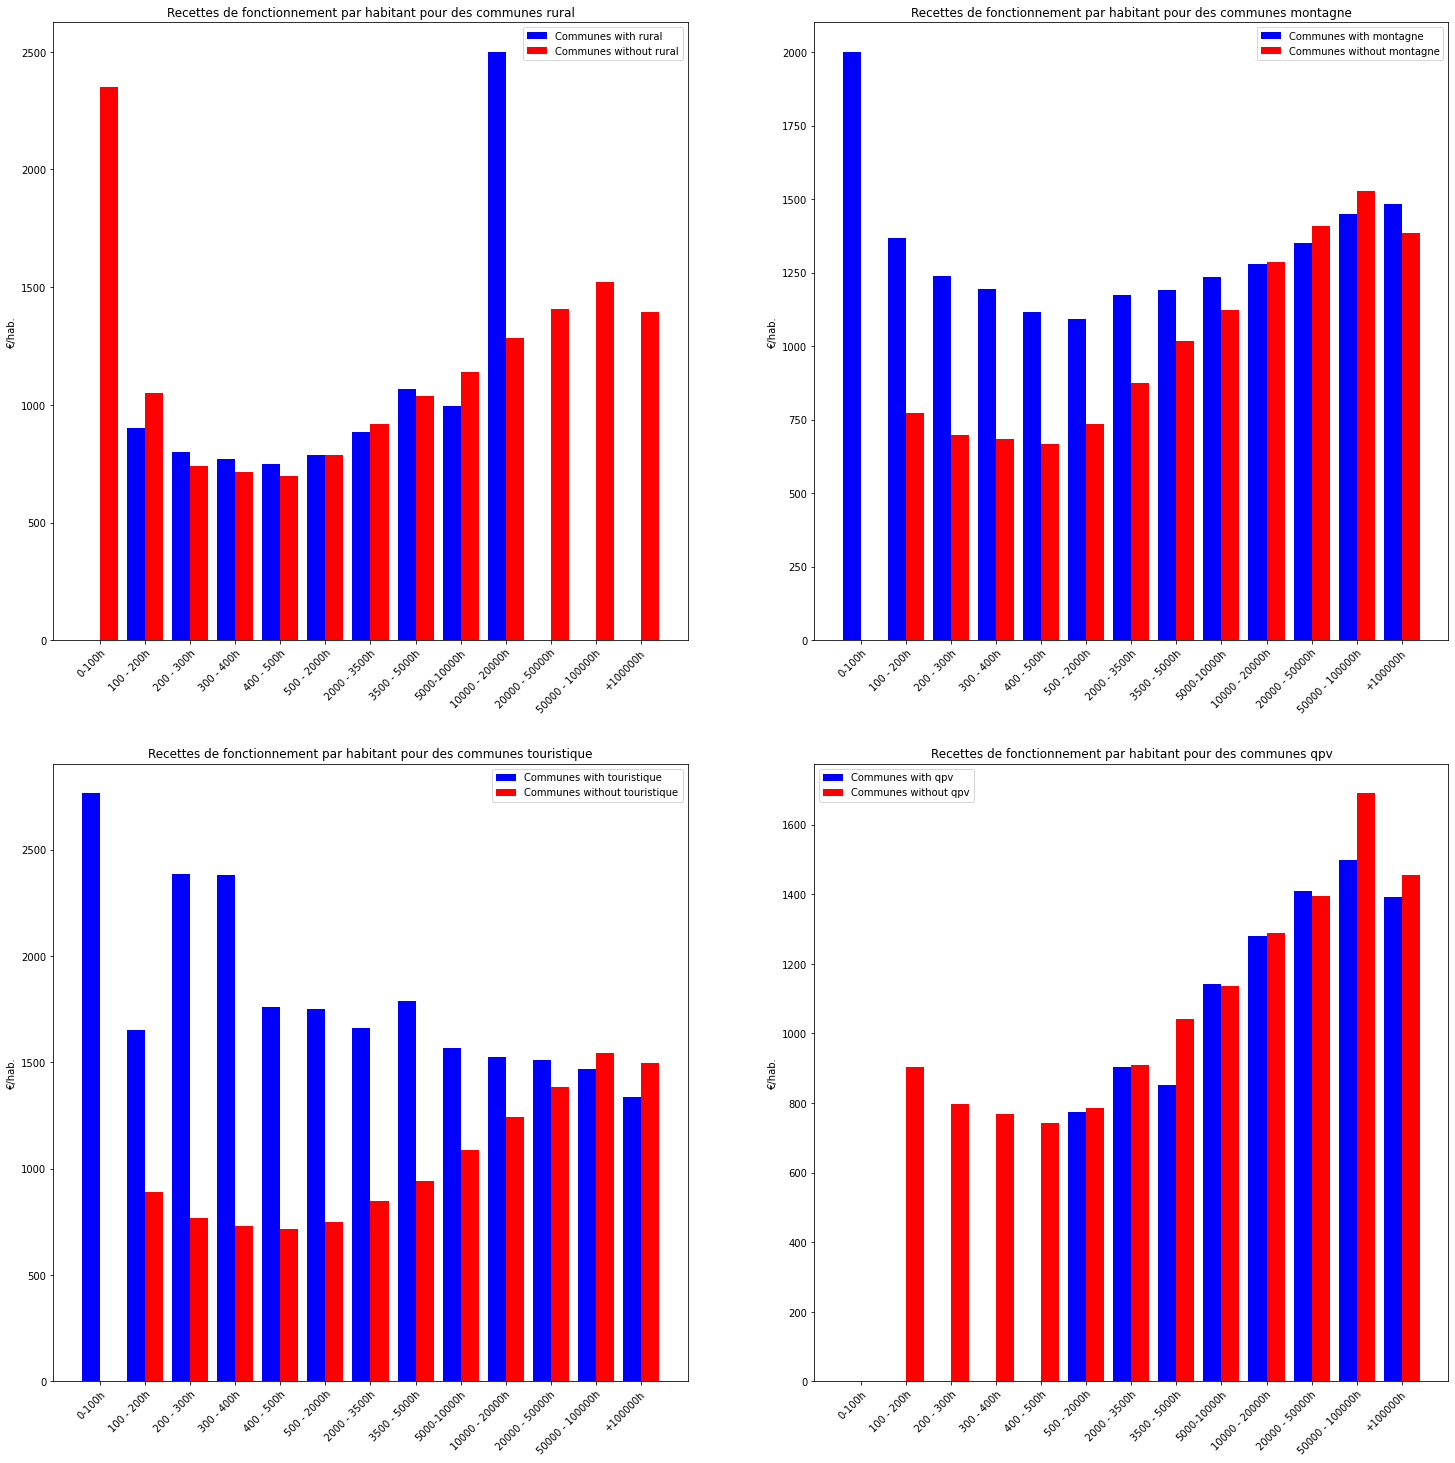

In [32]:
year = 2019

data = df[(df['exer']==year)&(df['agregat'] =='Recettes de fonctionnement')& (df['type_de_budget'] == 'Budget principal')]


data['pop_group'] = pd.cut(data['ptot'],[0,100,200,300,400,500,2000,3500,5000,10000, 20000, 50000, 100000, data['ptot'].max()], 
                                     labels= ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h'], 
                                      include_lowest=True)



options = ['rural', 'montagne', 'touristique', 'qpv']
for o in options:
    globals()[o] = data[data[o]=='Oui']
    globals()[o + '_' + 'no'] = data[data[o]=='Non']
    globals()[o] = globals()[o][globals()[o]['agregat']=='Recettes de fonctionnement']
    globals()[o + '_' + 'no'] = globals()[o + '_' + 'no'][globals()[o + '_' + 'no']['agregat']=='Recettes de fonctionnement']
    globals()[o + '_' + 'sum'] = globals()[o].groupby(['pop_group']).agg({'euros_par_habitant':'mean'})
    globals()[o + '_' + 'no' + '_' + 'sum'] = globals()[o + '_' + 'no'].groupby(['pop_group']).agg({'euros_par_habitant':'mean'})
    globals()[o + '_' + 'sum'] =  globals()[o + '_' + 'sum'].fillna(0)
    globals()[o + '_' + 'no' + '_' + 'sum'] = globals()[o + '_' + 'no' + '_' + 'sum'].fillna(0)


plt.figure(figsize= (25,25))
i = 1
for o in options:
    plt.subplot(2,2,i)    
    w = 0.4
    x = ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h']
    bar1 = np.arange(len(x))
    bar2 = [i+w for i in bar1]
    plt.bar(bar1,  globals()[o + '_' + 'sum']['euros_par_habitant'], w, color = 'blue', label = 'Communes with' + " " + o)
    plt.bar(bar2,  globals()[o + '_' + 'no' + '_' + 'sum']['euros_par_habitant'], w, color = 'red', label = 'Communes without' + " " + o)
    #plt.xlabel('')
    plt.ylabel('€/hab.')
    plt.xticks(bar1+w/2,x, rotation=45, ha = 'right', rotation_mode='anchor')
    plt.legend()
    plt.title('Recettes de fonctionnement par habitant pour des communes' + ' ' + o)
    i+=1

***Impôts et taxes par habitant selon la taille de la commune et selon le type de commune***

C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


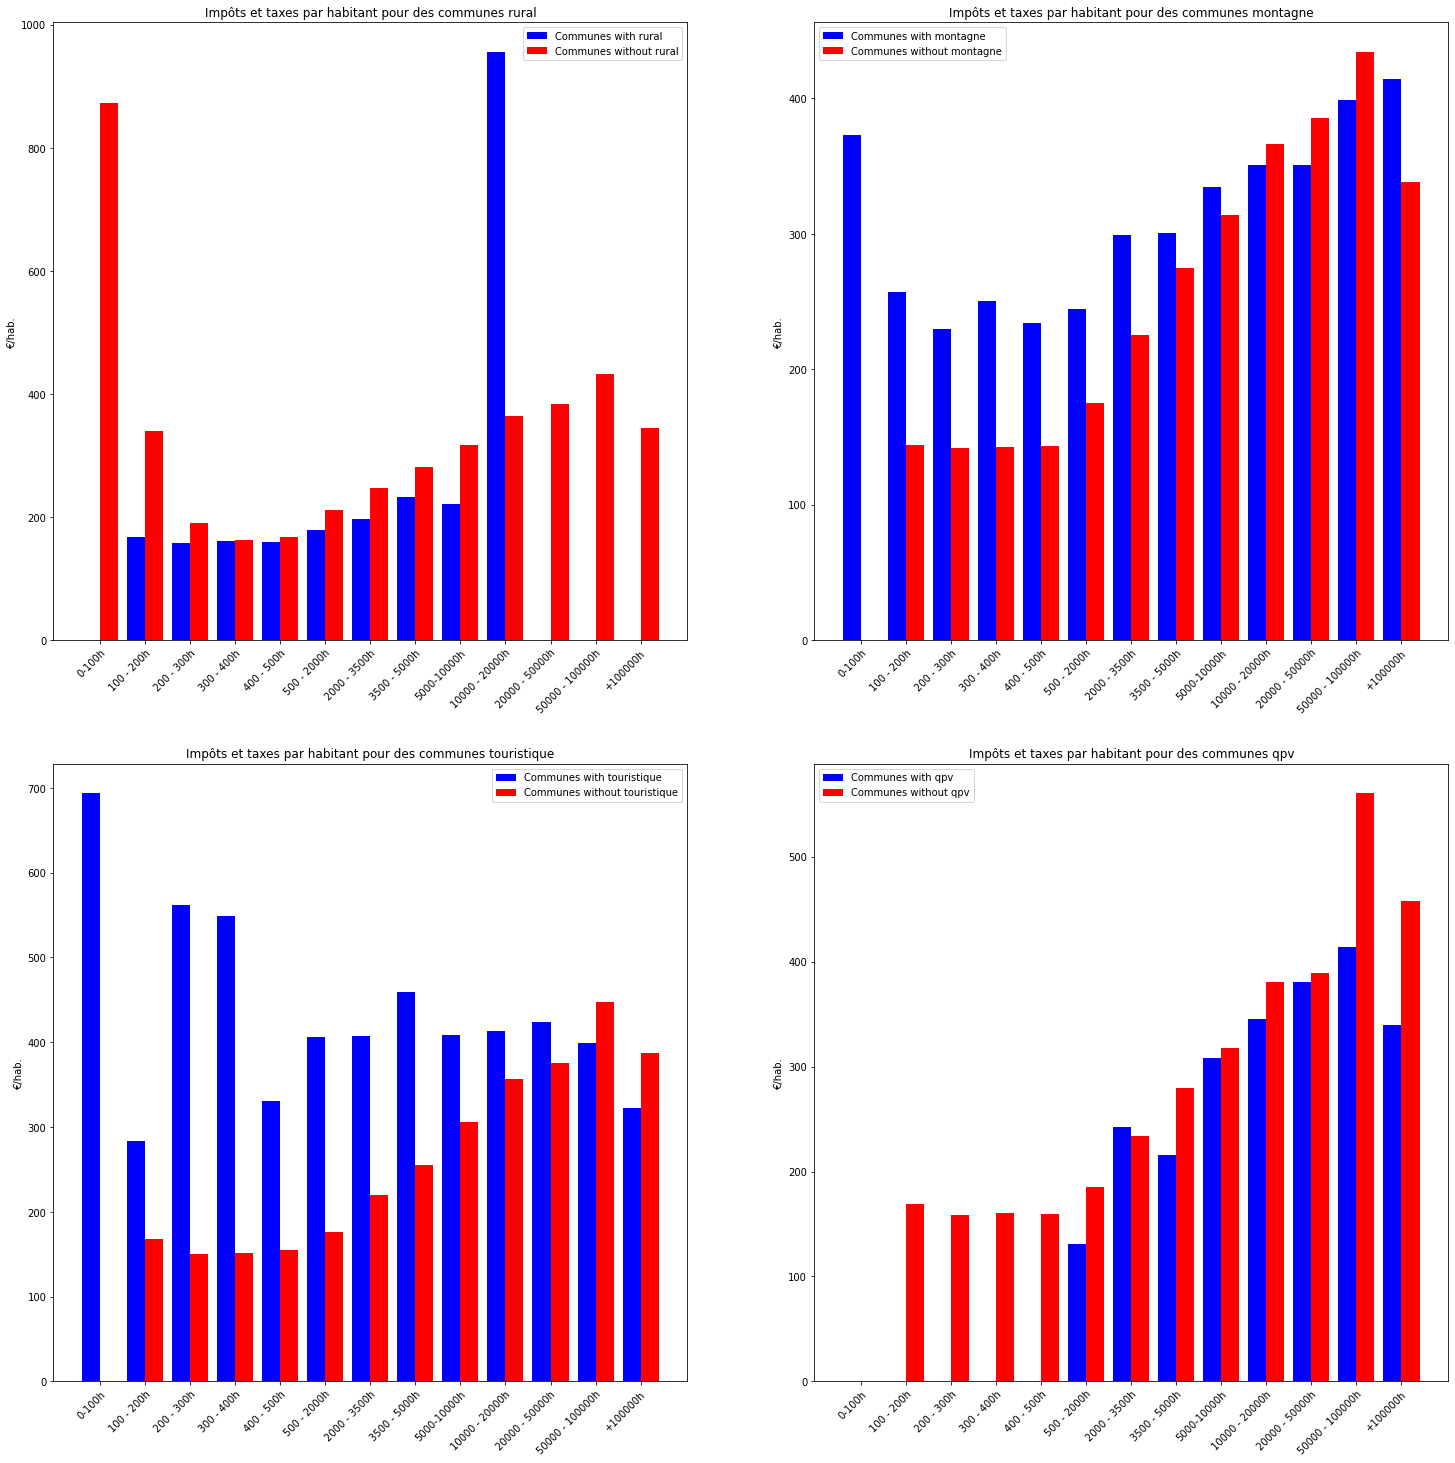

In [35]:
year = 2019

impots = ['Impôts locaux', 'Fiscalité reversée', "Taxe d'enlévement des ordures ménagères", 'Autres impôts et taxes']
data = df[(df['exer']==year)&(df['agregat'].isin(impots))& (df['type_de_budget'] == 'Budget principal')]


data['pop_group'] = pd.cut(data['ptot'],[0,100,200,300,400,500,2000,3500,5000,10000, 20000, 50000, 100000, data['ptot'].max()], 
                                     labels= ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h'], 
                                      include_lowest=True)



options = ['rural', 'montagne', 'touristique', 'qpv']
for o in options:
    globals()[o] = data[data[o]=='Oui']
    globals()[o + '_' + 'no'] = data[data[o]=='Non']
    globals()[o] = globals()[o][globals()[o]['agregat'].isin(impots)]
    globals()[o + '_' + 'no'] = globals()[o + '_' + 'no'][globals()[o + '_' + 'no']['agregat'].isin(impots)]
    globals()[o + '_' + 'sum'] = globals()[o].groupby(['pop_group']).agg({'euros_par_habitant':'mean'})
    globals()[o + '_' + 'no' + '_' + 'sum'] = globals()[o + '_' + 'no'].groupby(['pop_group']).agg({'euros_par_habitant':'mean'})
    globals()[o + '_' + 'sum'] =  globals()[o + '_' + 'sum'].fillna(0)
    globals()[o + '_' + 'no' + '_' + 'sum'] = globals()[o + '_' + 'no' + '_' + 'sum'].fillna(0)


plt.figure(figsize= (25,25))
i = 1
for o in options:
    plt.subplot(2,2,i)    
    w = 0.4
    x = ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h']
    bar1 = np.arange(len(x))
    bar2 = [i+w for i in bar1]
    plt.bar(bar1,  globals()[o + '_' + 'sum']['euros_par_habitant'], w, color = 'blue', label = 'Communes with' + " " + o)
    plt.bar(bar2,  globals()[o + '_' + 'no' + '_' + 'sum']['euros_par_habitant'], w, color = 'red', label = 'Communes without' + " " + o)
    #plt.xlabel('')
    plt.ylabel('€/hab.')
    plt.xticks(bar1+w/2,x, rotation=45, ha = 'right', rotation_mode='anchor')
    plt.legend()
    plt.title('Impôts et taxes par habitant pour des communes' + ' ' + o)
    i+=1

***Recettes de fonctionnement par habitant selon la taille de la commune et par type de recette***

C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


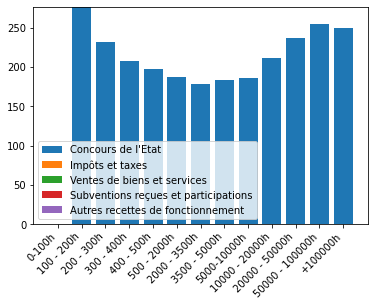

In [21]:
year = 2019

data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')]
    
data['pop_group'] = pd.cut(data['ptot'],[0,100,200,300,400,500,2000,3500,5000,10000, 20000, 50000, 100000, data['ptot'].max()], 
                                     labels= ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h'], 
                                      include_lowest=True)


recettes = ["Concours de l'Etat", 'Impôts et taxes', 'Ventes de biens et services',  'Subventions reçues et participations',
           'Autres recettes de fonctionnement']
pop_group = data['pop_group'].unique()

d = {}
for rec in recettes:
    d[rec]=None     
    
for rec in recettes:
    data = data[data['agregat'] == rec]
    globals()[rec] = data.groupby('pop_group').agg({'euros_par_habitant':'mean'}).reset_index()
    globals()[rec]['euros_par_habitant'] = globals()[rec]['euros_par_habitant'].fillna(0)   
    sol = globals()[rec].to_dict()
    d[rec] = sol['euros_par_habitant'] 
    
fig, ax = plt.subplots()
x = ['0-100h', '100 - 200h', '200 - 300h', '300 - 400h', '400 - 500h', '500 - 2000h', 
'2000 - 3500h', '3500 - 5000h', '5000-10000h', '10000 - 20000h', '20000 - 50000h', '50000 - 100000h', '+100000h']
ax.bar(x,d["Concours de l'Etat"].values(), label = "Concours de l'Etat");
ax.bar(x,d['Impôts et taxes'].values(), bottom =list(d["Concours de l'Etat"].values()), label = 'Impôts et taxes');
ax.bar(x,d['Ventes de biens et services'].values(), bottom =[x+y for (x,y) in zip(list(d["Concours de l'Etat"].values()),list(d['Impôts et taxes'].values()))], label = 'Ventes de biens et services');
ax.bar(x,d['Subventions reçues et participations'].values(), bottom =[x+y+z for (x,y,z) in zip(list(d["Concours de l'Etat"].values()),list(d['Impôts et taxes'].values()), list(d['Ventes de biens et services'].values()))], label = 'Subventions reçues et participations');
ax.bar(x,d['Autres recettes de fonctionnement'].values(), bottom =[x+y+z+j for (x,y,z,j) in zip(list(d["Concours de l'Etat"].values()),list(d['Impôts et taxes'].values()), list(d['Ventes de biens et services'].values()), 
                                                                   list(d['Subventions reçues et participations'].values()))],label = 'Autres recettes de fonctionnement');
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')


#ax.axhline(y=0, color='r') cambiar de color la linea del origen
#ax.set_title('Scores by group and gender')
ax.legend()
plt.show()  

***Dépenses d'investissement hors remboursement***

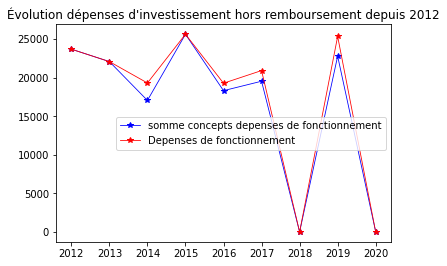

In [40]:
depenses_investissement = ["Dépenses d'équipement", "Subventions d'équipement versées", "Autres dépenses d'investissement"]
years = df['exer'].unique()
d = {}

for year in years:
    d[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat'].isin(depenses_investissement))]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d[year] = total

d2 = {}
for year in years:
    d2[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat']=="Dépenses d'investissement hors remb")]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d2[year] = total
fig, ax = plt.subplots()
ax.plot([year for year in sorted(years)], [d[year] for year in years], 'b-',
linewidth = 0.8, marker = '*', label = 'somme concepts depenses de fonctionnement')
ax.plot([year for year in sorted(years)], [d2[year] for year in years], 'r-', linewidth = 0.8, marker = '*', label = 'Depenses de fonctionnement')
ax.set_title ("Évolution dépenses d'investissement hors remboursement depuis 2012")
ax.legend()
plt.show()

***Recettes d'investissement hors emprunts***

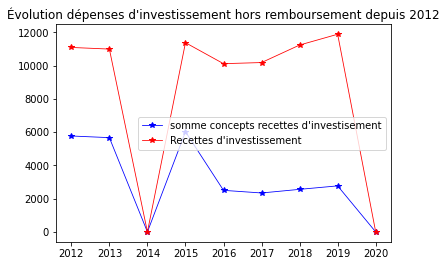

In [41]:
recettes_investissement = ["FCTVA", "Autres dotations et subventions d'equipement", "Autres recettes d'investissement"]
years = df['exer'].unique()
d = {}

for year in years:
    d[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat'].isin(recettes_investissement))]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d[year] = total

d2 = {}
for year in years:
    d2[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat']=="Recettes d'investissement hors emprunts")]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d2[year] = total
fig, ax = plt.subplots()
ax.plot([year for year in sorted(years)], [d[year] for year in years], 'b-',
linewidth = 0.8, marker = '*', label = "somme concepts recettes d'investisement")
ax.plot([year for year in sorted(years)], [d2[year] for year in years], 'r-', linewidth = 0.8, marker = '*', label = "Recettes d'investissement")
ax.set_title ("Évolution recettes d'investissement hors emprunts depuis 2012")
ax.legend()
plt.show()

***Dette***

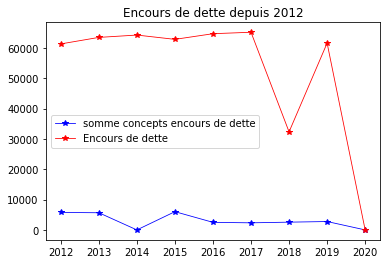

In [42]:
dette = ['Encours de dette - Dépôts et cautionnements reçus', 'Encours de dette - Dettes bancaires et assimilées']
years = df['exer'].unique()
d = {}

for year in years:
    d[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat'].isin(recettes_investissement))]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d[year] = total

d2 = {}
for year in years:
    d2[year]=None
    data = df[(df['exer']==year)&(df['type_de_budget'] == 'Budget principal')&(df['agregat']=="Encours de dette")]
    group = data.groupby('com_name').agg({'montant_en_millions':'sum'}).reset_index()
    total = group['montant_en_millions'].sum()
    d2[year] = total
fig, ax = plt.subplots()
ax.plot([year for year in sorted(years)], [d[year] for year in years], 'b-',
linewidth = 0.8, marker = '*', label = "somme concepts encours de dette")
ax.plot([year for year in sorted(years)], [d2[year] for year in years], 'r-', linewidth = 0.8, marker = '*', label = "Encours de dette")
ax.set_title ("Encours de dette depuis 2012")
ax.legend()
plt.show()

In [ ]:
       'Dépôts au Trésor',
       'Epargne de gestion',        
     
       
       'Emprunts hors GAD', "Remboursements d'emprunts hors GAD",
       'Annuité de la dette', 
       
       "Produit des cesssions d'immobilisations",
       'Subventions aux personnes de droit privé',
       
       'Fonds de soutien aux emprunts à risque',
       
       'Versement transport', 
      